# Finance & Risk Analytics Project- Milestone-2

# Problem Statement

**Businesses or companies can fall prey to default if they are not able to keep up their debt obligations. Defaults will lead to a lower credit rating for the company which in turn reduces its chances of getting credit in the future and may have to pay higher interests on existing debts as well as any new obligations. From an investor's point of view, he would want to invest in a company if it is capable of handling its financial obligations, can grow quickly, and is able to manage the growth scale.**

**A balance sheet is a financial statement of a company that provides a snapshot of what a company owns, owes, and the amount invested by the shareholders. Thus, it is an important tool that helps evaluate the performance of a business.**

**Data that is available includes information from the financial statement of the companies for the previous year.**

**Explanation of data fields available in Data Dictionary, 'Credit Default Data Dictionary.xlsx'**

Hints :

**Test Train Split -   Split the data into Train and Test dataset in a ratio of 67:33 and use random_state =42. Model Building is to be done on Train Dataset and Model Validation is to be done on Test Dataset.**

**Credit Risk Dataset**

**Data Dictionary**

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
color = sns.color_palette()
import sklearn.metrics as metrics
from sklearn.tree import DecisionTreeClassifier
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix

In [5]:
df = pd.read_excel("CompData-1.xlsx")
df.head()

,Co_Code,Co_Name,_Operating_Expense_Rate,_Research_and_development_expense_rate,_Cash_flow_rate,_Interest_bearing_debt_interest_rate,_Tax_rate_A,_Cash_Flow_Per_Share,_Per_Share_Net_profit_before_tax_Yuan_,_Realized_Sales_Gross_Profit_Growth_Rate,...,_Cash_Flow_to_Equity,_Current_Liability_to_Current_Assets,_Liability_Assets_Flag,_Total_assets_to_GNP_price,_No_credit_Interval,_Degree_of_Financial_Leverage_DFL,_Interest_Coverage_Ratio_Interest_expense_to_EBIT,_Net_Income_Flag,_Equity_to_Liability,Default
0,16974,Hind.Cables,8.820000e+09,0.000000e+00,0.462045,0.000352,0.001417,0.322558,0.194472,0.022074,...,0.310901,0.034913,0,0.028801,0.620927,0.026930,0.565744,1,0.015338,0
1,21214,Tata Tele. Mah.,9.380000e+09,4.230000e+09,0.460116,0.000716,0.000000,0.315520,0.161633,0.021902,...,0.314572,0.041653,0,0.006191,0.622513,0.026297,0.560741,1,0.029445,1
2,14852,ABG Shipyard,3.800000e+09,8.150000e+08,0.449893,0.000496,0.000000,0.299851,0.172554,0.022186,...,0.314777,0.033560,0,0.001095,0.623749,0.027276,0.566744,1,0.041718,0
3,2439,GTL,6.440000e+09,0.000000e+00,0.462731,0.000592,0.009313,0.319834,0.174738,0.027638,...,0.316974,0.016527,0,0.003749,0.622963,0.026988,0.565950,1,0.026956,0
4,23505,Bharati Defence,3.680000e+09,0.000000e+00,0.463117,0.000782,0.400243,0.325104,0.176546,0.022072,...,0.317729,0.034497,0,0.006595,0.624419,0.027498,0.567177,1,0.019900,0


In [6]:
df.shape

(2058, 58)

Describe the data

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Co_Code,2058.0,1.757211e+04,2.189289e+04,4.000000,3.674000e+03,6.240000e+03,2.428075e+04,7.249300e+04
_Operating_Expense_Rate,2058.0,2.052389e+09,3.252624e+09,0.000100,1.578727e-04,3.330330e-04,4.110000e+09,9.980000e+09
_Research_and_development_expense_rate,2058.0,1.208634e+09,2.144568e+09,0.000000,0.000000e+00,1.994130e-04,1.550000e+09,9.980000e+09
_Cash_flow_rate,2058.0,4.652426e-01,2.266269e-02,0.000000,4.600991e-01,4.634450e-01,4.680691e-01,1.000000e+00
_Interest_bearing_debt_interest_rate,2058.0,1.113022e+07,9.042595e+07,0.000000,2.760280e-04,4.540450e-04,6.630660e-04,9.900000e+08
_Tax_rate_A,2058.0,1.147770e-01,1.524457e-01,0.000000,0.000000e+00,3.709890e-02,2.161909e-01,9.996963e-01
_Cash_Flow_Per_Share,1891.0,3.199856e-01,1.529979e-02,0.169449,3.149890e-01,3.206479e-01,3.259178e-01,4.622268e-01
_Per_Share_Net_profit_before_tax_Yuan_,2058.0,1.769673e-01,3.015730e-02,0.000000,1.666039e-01,1.756421e-01,1.858854e-01,7.923477e-01
_Realized_Sales_Gross_Profit_Growth_Rate,2058.0,2.276117e-02,2.170104e-02,0.004282,2.205831e-02,2.210001e-02,2.215200e-02,1.000000e+00
_Operating_Profit_Growth_Rate,2058.0,8.481083e-01,4.589093e-03,0.736430,8.479740e-01,8.480386e-01,8.481147e-01,1.000000e+00


Columns names

Checking for duplicate values

In [8]:
df.duplicated().sum()

0

Datatypes details

In [9]:
df.dtypes

Co_Code                                                int64
Co_Name                                               object
_Operating_Expense_Rate                              float64
_Research_and_development_expense_rate               float64
_Cash_flow_rate                                      float64
_Interest_bearing_debt_interest_rate                 float64
_Tax_rate_A                                          float64
_Cash_Flow_Per_Share                                 float64
_Per_Share_Net_profit_before_tax_Yuan_               float64
_Realized_Sales_Gross_Profit_Growth_Rate             float64
_Operating_Profit_Growth_Rate                        float64
_Continuous_Net_Profit_Growth_Rate                   float64
_Total_Asset_Growth_Rate                             float64
_Net_Value_Growth_Rate                               float64
_Total_Asset_Return_Growth_Rate_Ratio                float64
_Cash_Reinvestment_perc                              float64
_Current_Ratio          

Info of the data

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2058 entries, 0 to 2057
Data columns (total 58 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   Co_Code                                            2058 non-null   int64  
 1   Co_Name                                            2058 non-null   object 
 2   _Operating_Expense_Rate                            2058 non-null   float64
 3   _Research_and_development_expense_rate             2058 non-null   float64
 4   _Cash_flow_rate                                    2058 non-null   float64
 5   _Interest_bearing_debt_interest_rate               2058 non-null   float64
 6   _Tax_rate_A                                        2058 non-null   float64
 7   _Cash_Flow_Per_Share                               1891 non-null   float64
 8   _Per_Share_Net_profit_before_tax_Yuan_             2058 non-null   float64
 9   _Realize

Outlier Treatment

In [11]:
df_num= df.select_dtypes(include=['float64','int64'])

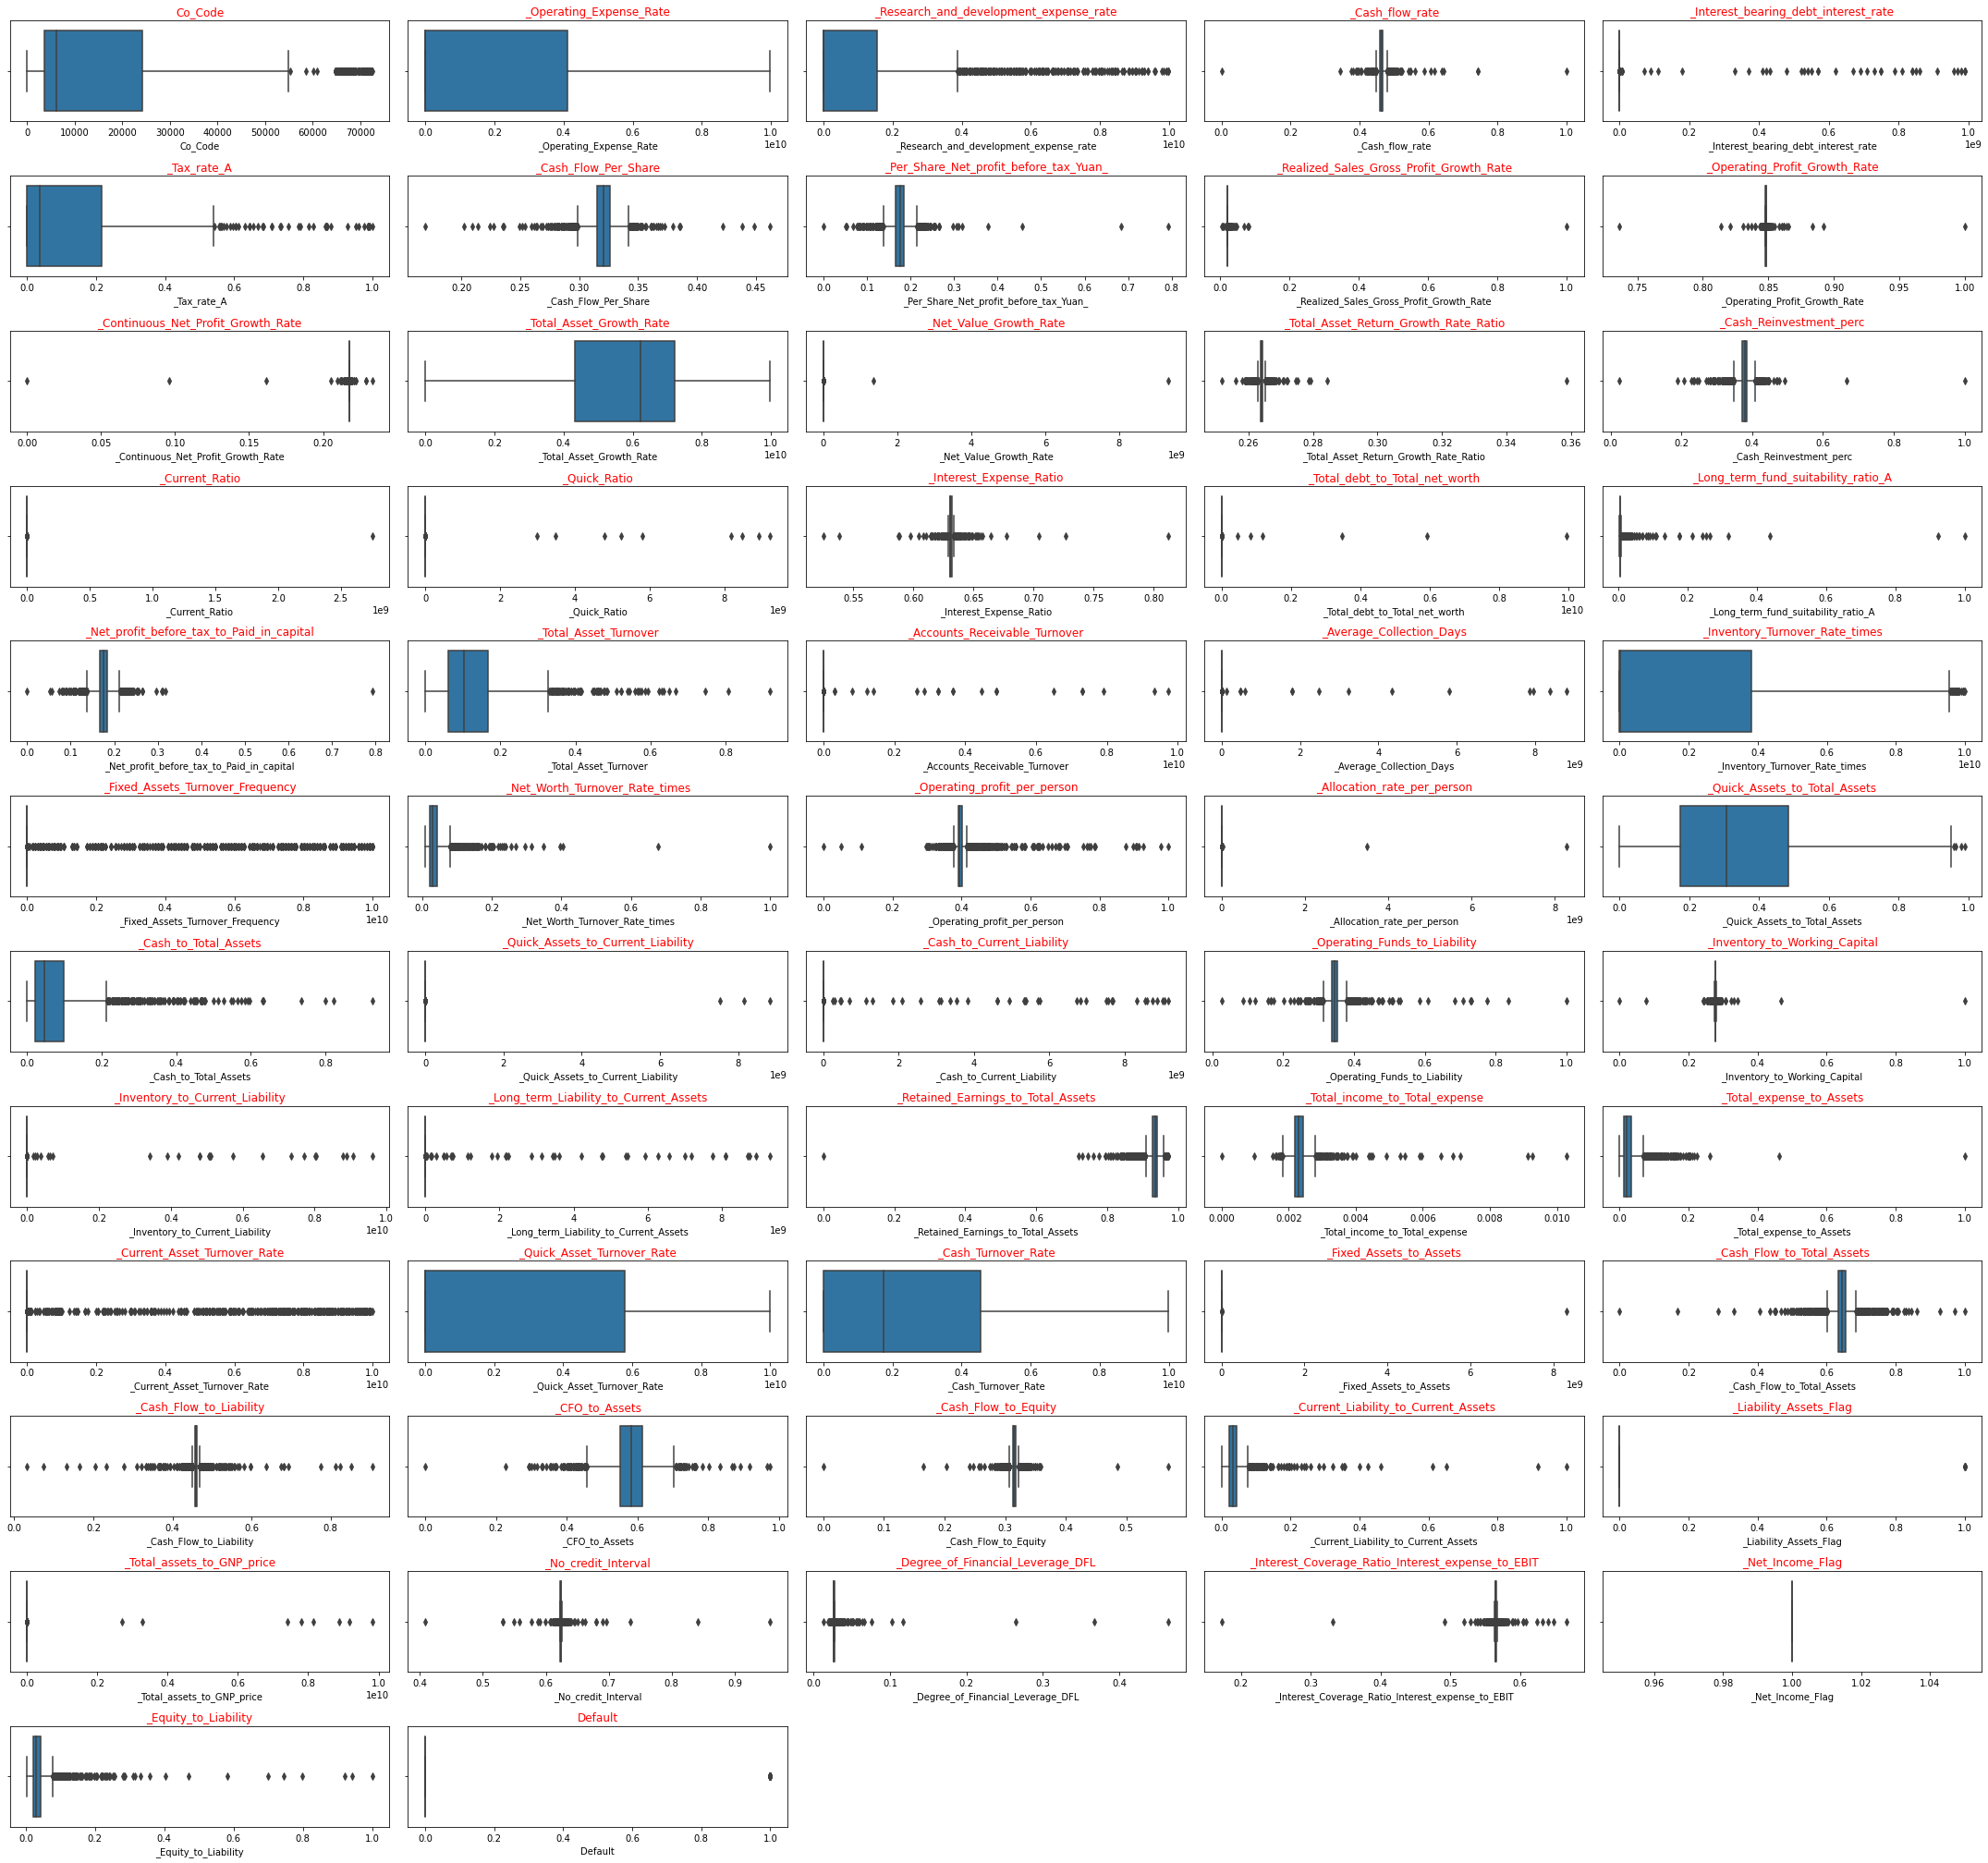

In [12]:
data_plot=df_num
fig=plt.figure(figsize=(30,30))
for i in range(0,len(data_plot.columns)):
    ax=fig.add_subplot(13,5,i+1)
    sns.boxplot(data_plot[data_plot.columns[i]])
    ax.set_title(data_plot.columns[i],color='Red')
plt.tight_layout()

In [13]:
def treat_outlier(x):

    q5= np.percentile(x,5)
    q25=np.percentile(x,25)
    q75=np.percentile(x,75)
    dt=np.percentile(x,95)
   
    IQR=q75-q25
    
    lower_bound=q25-(1.5*IQR)
    upper_bound=q75+(1.5*IQR)

    return x.apply(lambda y: q5 if y < lower_bound else y).apply(lambda y: dt if y > upper_bound else y)

In [14]:
def print_outlier(x):
    
    q5= np.percentile(x,5)
    q25=np.percentile(x,25)
    q75=np.percentile(x,75)
    dt=np.percentile(x,95)
    min_val = min(x)
    max_val = max(x)
   
    IQR=q75-q25
    
    lower_bound=q25-(1.5*IQR)
    upper_bound=q75+(1.5*IQR)
 
    return ('5%=',q5,'Q1=',q25,'Q3=',q75,'IQR=',IQR,'LL=',lower_bound,'UL=', upper_bound, '95%', dt, 'max=',max_val, 'min=',min_val)

In [15]:
for i in df_num.columns:    
    df_num[i]=treat_outlier(df_num[i])

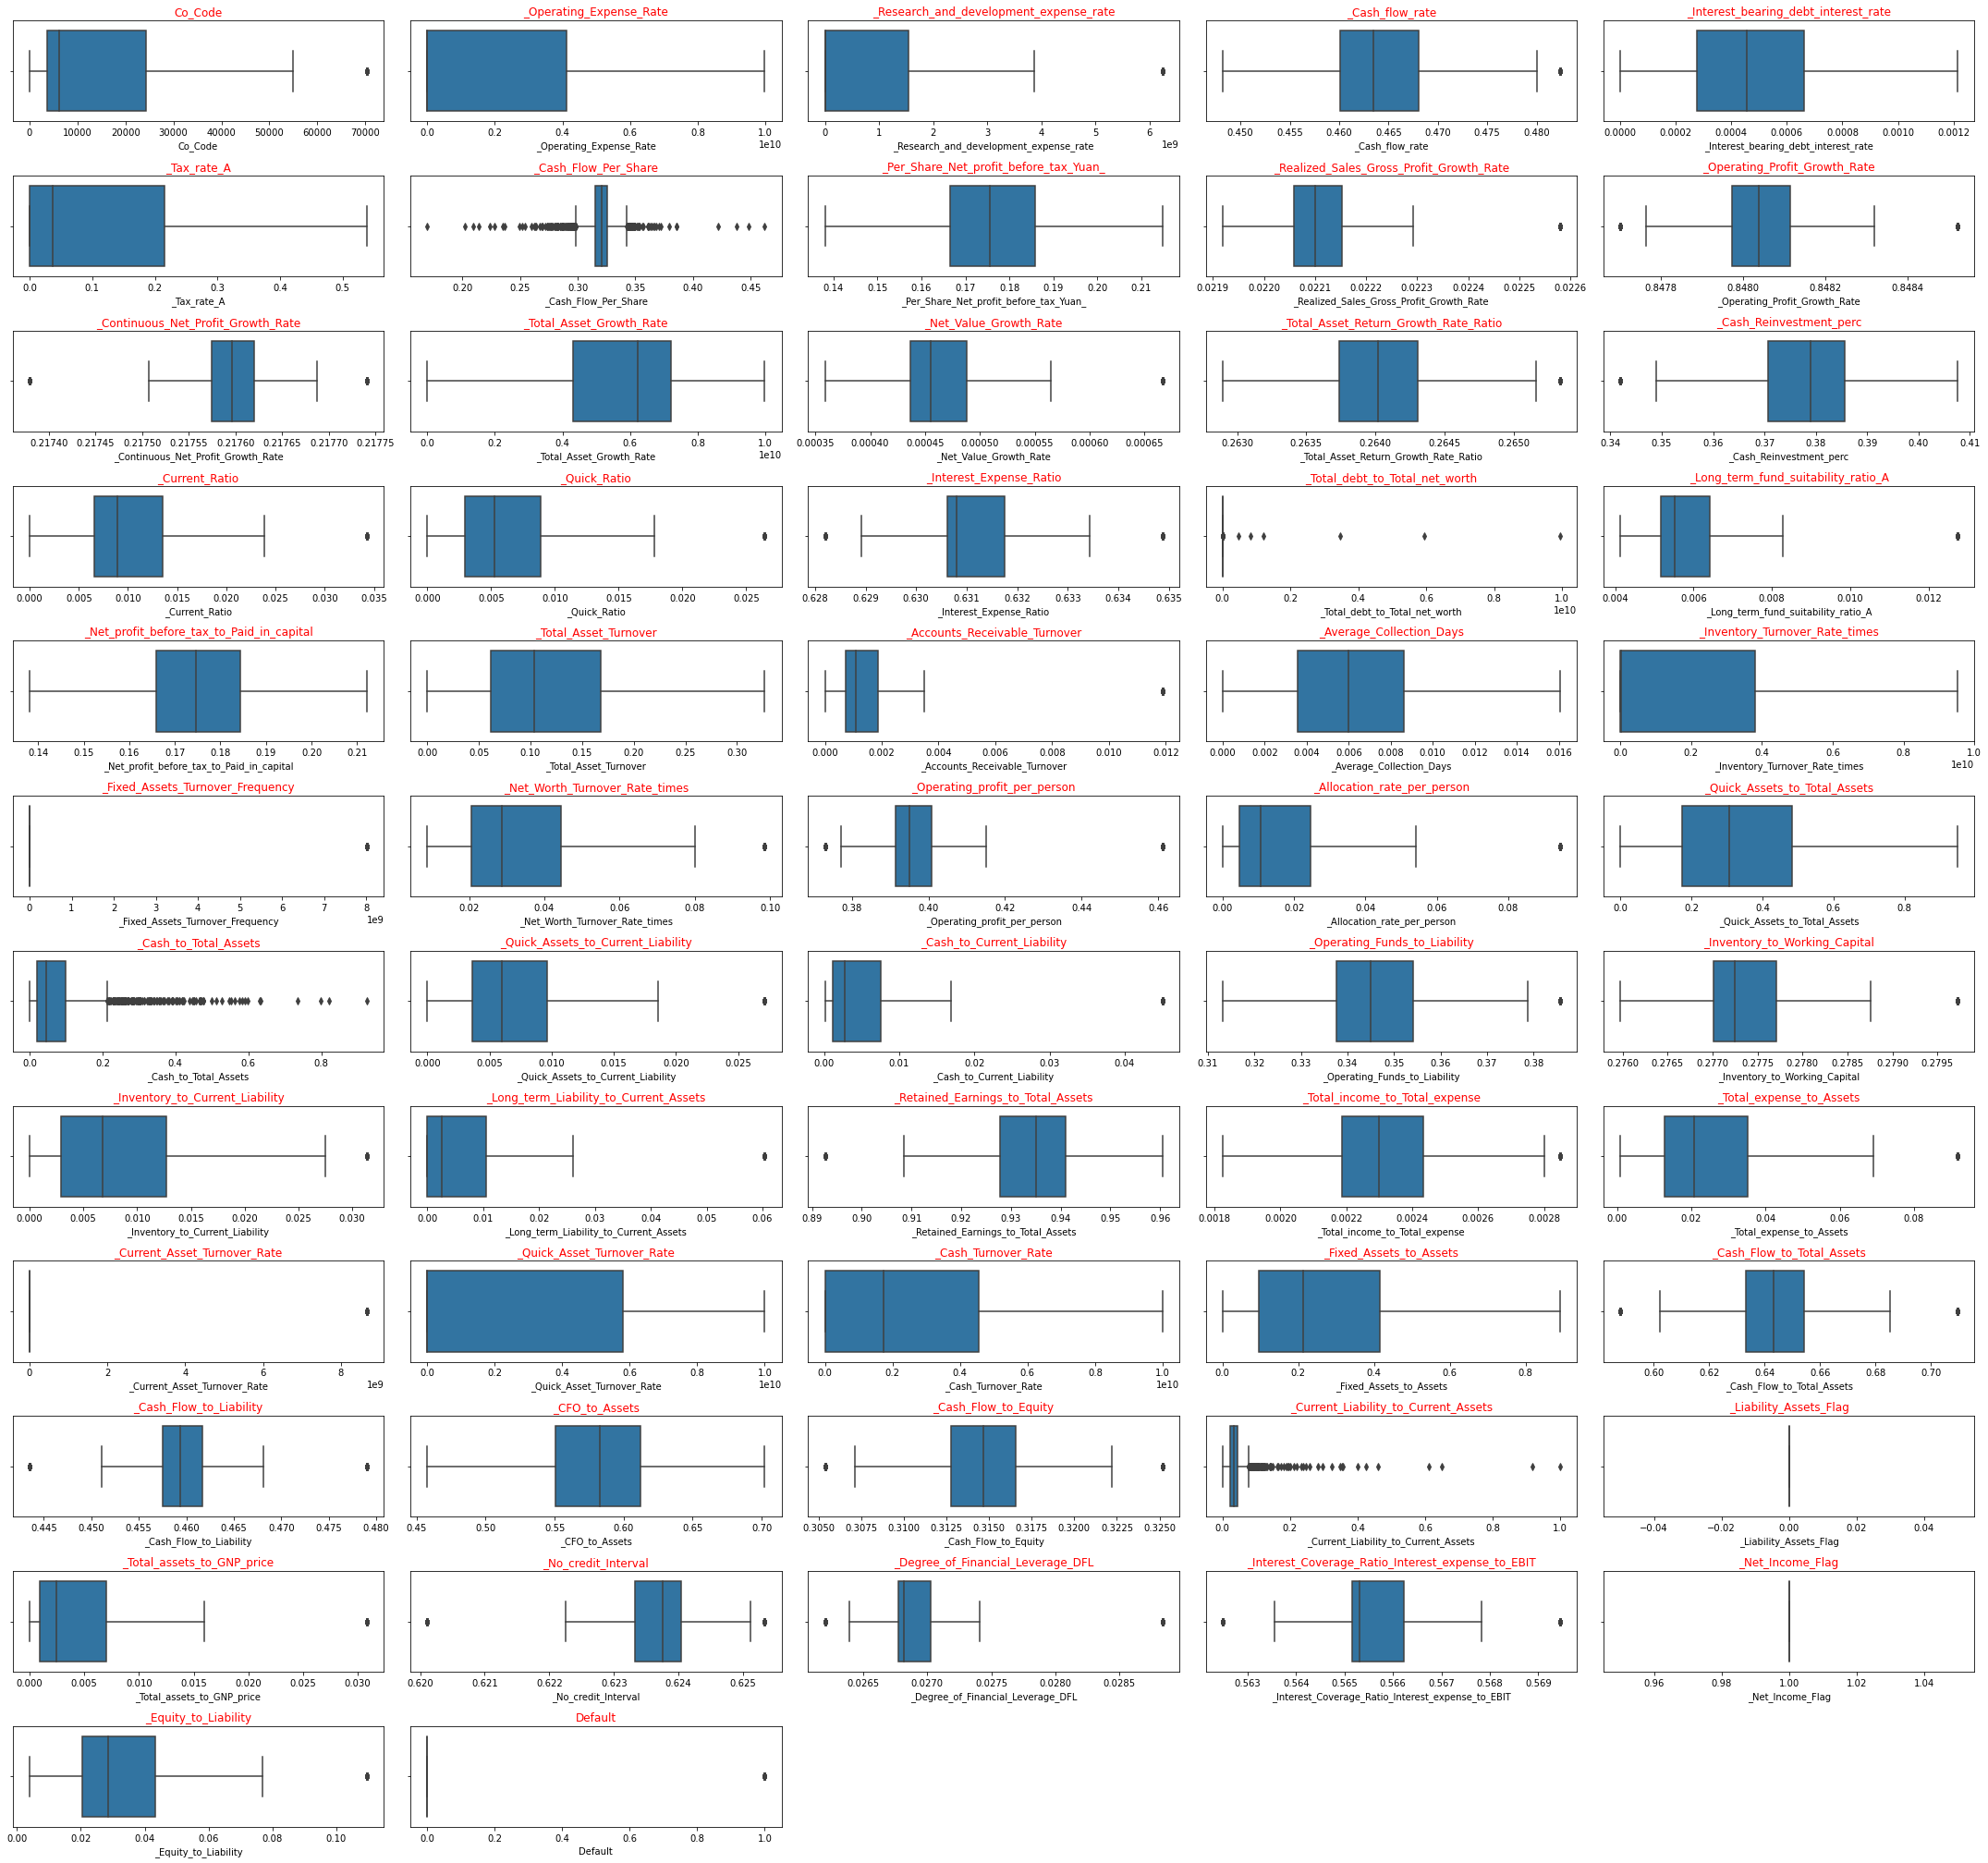

In [16]:
data_plot=df_num
fig=plt.figure(figsize=(30,30))
for i in range(0,len(data_plot.columns)):
    ax=fig.add_subplot(13,5,i+1)
    sns.boxplot(data_plot[data_plot.columns[i]])
    ax.set_title(data_plot.columns[i],color='Red')
plt.tight_layout()

Missing Value Treatment

In [21]:
df.isnull().sum()

Co_Code                                                0
Co_Name                                                0
_Operating_Expense_Rate                                0
_Research_and_development_expense_rate                 0
_Cash_flow_rate                                        0
_Interest_bearing_debt_interest_rate                   0
_Tax_rate_A                                            0
_Cash_Flow_Per_Share                                 167
_Per_Share_Net_profit_before_tax_Yuan_                 0
_Realized_Sales_Gross_Profit_Growth_Rate               0
_Operating_Profit_Growth_Rate                          0
_Continuous_Net_Profit_Growth_Rate                     0
_Total_Asset_Growth_Rate                               0
_Net_Value_Growth_Rate                                 0
_Total_Asset_Return_Growth_Rate_Ratio                  0
_Cash_Reinvestment_perc                                0
_Current_Ratio                                         0
_Quick_Ratio                   

In [22]:
df['_Cash_Flow_Per_Share'] = df['_Cash_Flow_Per_Share'].fillna(df['_Cash_Flow_Per_Share'].median())

In [23]:
df['_Current_Liability_to_Current_Assets'] = df['_Current_Liability_to_Current_Assets'].fillna(df['_Current_Liability_to_Current_Assets'].median())

In [24]:
df['_Cash_to_Total_Assets'] = df['_Cash_to_Total_Assets'].fillna(df['_Cash_to_Total_Assets'].median())

In [25]:
df['_Total_debt_to_Total_net_worth'] = df['_Total_debt_to_Total_net_worth'].fillna(df['_Total_debt_to_Total_net_worth'].median())

In [26]:
df.isnull().sum()

Co_Code                                              0
Co_Name                                              0
_Operating_Expense_Rate                              0
_Research_and_development_expense_rate               0
_Cash_flow_rate                                      0
_Interest_bearing_debt_interest_rate                 0
_Tax_rate_A                                          0
_Cash_Flow_Per_Share                                 0
_Per_Share_Net_profit_before_tax_Yuan_               0
_Realized_Sales_Gross_Profit_Growth_Rate             0
_Operating_Profit_Growth_Rate                        0
_Continuous_Net_Profit_Growth_Rate                   0
_Total_Asset_Growth_Rate                             0
_Net_Value_Growth_Rate                               0
_Total_Asset_Return_Growth_Rate_Ratio                0
_Cash_Reinvestment_perc                              0
_Current_Ratio                                       0
_Quick_Ratio                                         0
_Interest_

In [28]:
df = df.drop(['Co_Code', 'Co_Name'], axis = 1)
df.head()

,_Operating_Expense_Rate,_Research_and_development_expense_rate,_Cash_flow_rate,_Interest_bearing_debt_interest_rate,_Tax_rate_A,_Cash_Flow_Per_Share,_Per_Share_Net_profit_before_tax_Yuan_,_Realized_Sales_Gross_Profit_Growth_Rate,_Operating_Profit_Growth_Rate,_Continuous_Net_Profit_Growth_Rate,...,_Cash_Flow_to_Equity,_Current_Liability_to_Current_Assets,_Liability_Assets_Flag,_Total_assets_to_GNP_price,_No_credit_Interval,_Degree_of_Financial_Leverage_DFL,_Interest_Coverage_Ratio_Interest_expense_to_EBIT,_Net_Income_Flag,_Equity_to_Liability,Default
0,8.820000e+09,0.000000e+00,0.462045,0.000352,0.001417,0.322558,0.194472,0.022074,0.848021,0.217590,...,0.310901,0.034913,0,0.028801,0.620927,0.026930,0.565744,1,0.015338,0
1,9.380000e+09,4.230000e+09,0.460116,0.000716,0.000000,0.315520,0.161633,0.021902,0.839645,0.217360,...,0.314572,0.041653,0,0.006191,0.622513,0.026297,0.560741,1,0.029445,1
2,3.800000e+09,8.150000e+08,0.449893,0.000496,0.000000,0.299851,0.172554,0.022186,0.848196,0.217573,...,0.314777,0.033560,0,0.001095,0.623749,0.027276,0.566744,1,0.041718,0
3,6.440000e+09,0.000000e+00,0.462731,0.000592,0.009313,0.319834,0.174738,0.027638,0.848391,0.217662,...,0.316974,0.016527,0,0.003749,0.622963,0.026988,0.565950,1,0.026956,0
4,3.680000e+09,0.000000e+00,0.463117,0.000782,0.400243,0.325104,0.176546,0.022072,0.847987,0.217589,...,0.317729,0.034497,0,0.006595,0.624419,0.027498,0.567177,1,0.019900,0


# 1.8 Build a Random Forest Model on Train Dataset. Also showcase your model building approach

Random Forest Classifier

In [29]:
X = df.drop('Default', axis = 1)
y = df['Default']

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X,y, 
                                                    test_size = 0.33, random_state = 42)

In [32]:
print('The training set for the independent variables:',X_train.shape)
print('The training set for the dependent variable:',y_train.shape)
print('The test set for the independent variables:',X_test.shape)
print('The test set for the dependent variable:',y_test.shape)

The training set for the independent variables: (1378, 55)
The training set for the dependent variable: (1378,)
The test set for the independent variables: (680, 55)
The test set for the dependent variable: (680,)


In [33]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [15,20],
    'min_samples_leaf': [10,20],
    'min_samples_split': [ 50,100],
    'n_estimators': [301,401,701]
}

rfcl = RandomForestClassifier()

grid_search = GridSearchCV(estimator = rfcl, param_grid = param_grid)

In [34]:
grid_search.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_depth': [15, 20], 'min_samples_leaf': [10, 20],
                         'min_samples_split': [50, 100],
                         'n_estimators': [301, 401, 701]})

In [35]:
grid_search.best_params_

{'max_depth': 20,
 'min_samples_leaf': 10,
 'min_samples_split': 50,
 'n_estimators': 301}

In [36]:
best_grid = grid_search.best_estimator_

In [37]:
pred_train_rf = best_grid.predict(X_train)
pred_test_rf = best_grid.predict(X_test)

In [38]:
ytrain_predict_prob_rm= best_grid.predict_proba(X_train)
pd.DataFrame(ytrain_predict_prob_rm).head()

,0,1
0,0.982280,0.017720
1,0.972910,0.027090
2,0.997377,0.002623
3,0.996990,0.003010
4,0.977364,0.022636


In [39]:
ytest_predict_prob_rm=best_grid.predict_proba(X_test)
pd.DataFrame(ytest_predict_prob_rm).head()

,0,1
0,0.990355,0.009645
1,0.999567,0.000433
2,0.971219,0.028781
3,0.994064,0.005936
4,0.910994,0.089006


In [40]:
print(pd.DataFrame(best_grid.feature_importances_, columns=["IMP"],index = X_train.columns).sort_values('IMP',ascending =False))

                                                        IMP
_Net_Value_Growth_Rate                             0.130920
_Net_profit_before_tax_to_Paid_in_capital          0.104867
_Per_Share_Net_profit_before_tax_Yuan_             0.083691
_Total_income_to_Total_expense                     0.082997
_Equity_to_Liability                               0.056386
_Retained_Earnings_to_Total_Assets                 0.055857
_Interest_Coverage_Ratio_Interest_expense_to_EBIT  0.045190
_Total_debt_to_Total_net_worth                     0.043081
_Interest_Expense_Ratio                            0.040298
_Degree_of_Financial_Leverage_DFL                  0.031903
_Current_Ratio                                     0.027463
_Inventory_to_Working_Capital                      0.024003
_Quick_Ratio                                       0.021154
_Current_Liability_to_Current_Assets               0.020044
_Operating_profit_per_person                       0.016011
_Cash_to_Current_Liability              

# 1.9 Validate the Random Forest Model on test Dataset and state the performance matrices. Also state interpretation from the model

In [41]:
print(metrics.classification_report(y_train, pred_train_rf))

              precision    recall  f1-score   support

           0       0.94      0.99      0.96      1225
           1       0.84      0.46      0.60       153

    accuracy                           0.93      1378
   macro avg       0.89      0.73      0.78      1378
weighted avg       0.93      0.93      0.92      1378



In [42]:
print(metrics.classification_report(y_test, pred_test_rf))

              precision    recall  f1-score   support

           0       0.94      0.98      0.96       613
           1       0.67      0.39      0.49        67

    accuracy                           0.92       680
   macro avg       0.80      0.68      0.72       680
weighted avg       0.91      0.92      0.91       680



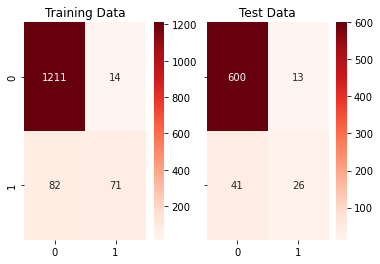

In [43]:
f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False)
plot_0 = sns.heatmap((metrics.confusion_matrix(y_train, pred_train_rf)),annot=True,fmt='.5g',cmap='Reds',ax=a[0][0]);
a[0][0].set_title('Training Data')
plot_1 = sns.heatmap((metrics.confusion_matrix(y_test, pred_test_rf)),annot=True,fmt='.5g',cmap='Reds',ax=a[0][1]);
a[0][1].set_title('Test Data');

AUC for the Training Data: 0.961


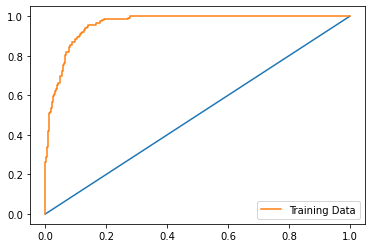

In [44]:
train_auc_rf = metrics.roc_auc_score(y_train,ytrain_predict_prob_rm[:,1])
print('AUC for the Training Data: %.3f' % train_auc_rf)
fpr, tpr, thresholds = metrics.roc_curve(y_train,ytrain_predict_prob_rm[:,1])
plt.plot([0, 1], [0, 1], linestyle='-')
plt.plot(fpr, tpr,label = 'Training Data')
plt.legend(loc='best')
plt.show()

AUC for the Test Data: 0.927


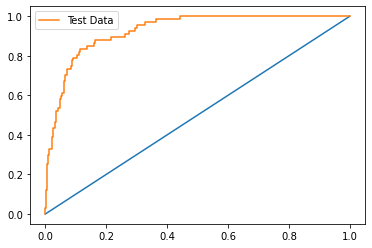

In [45]:
test_auc_rf = metrics.roc_auc_score(y_test,ytest_predict_prob_rm[:,1])
print('AUC for the Test Data: %.3f' %test_auc_rf )
fpr, tpr, thresholds = metrics.roc_curve(y_test,ytest_predict_prob_rm[:,1])
plt.plot([0, 1], [0, 1], linestyle='-')
plt.plot(fpr, tpr,label='Test Data')
plt.legend(loc='best')
plt.show()

# 1.10 Build a LDA Model on Train Dataset. Also showcase your model building approach

In [46]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [47]:
LDA = LinearDiscriminantAnalysis()

In [48]:
lda_model = LDA.fit(X_train, y_train)

In [49]:
pred_train_lda = lda_model.predict(X_train)
pred_test_lda = lda_model.predict(X_test)

In [50]:
ytrain_predict_prob_lda= lda_model.predict_proba(X_train)
pd.DataFrame(ytrain_predict_prob_lda).head()

,0,1
0,0.921580,0.078420
1,0.980494,0.019506
2,0.992500,0.007500
3,0.995654,0.004346
4,0.987760,0.012240


In [51]:
ytest_predict_prob_lda= lda_model.predict_proba(X_test)
pd.DataFrame(ytest_predict_prob_lda).head()

,0,1
0,0.985759,0.014241
1,0.995441,0.004559
2,0.982462,0.017538
3,0.984908,0.015092
4,0.843093,0.156907


# 1.11 Validate the LDA Model on test Dataset and state the performance matrices. Also state interpretation from the model

In [52]:
print(classification_report(y_train, pred_train_lda));

              precision    recall  f1-score   support

           0       0.92      0.97      0.95      1225
           1       0.60      0.33      0.42       153

    accuracy                           0.90      1378
   macro avg       0.76      0.65      0.68      1378
weighted avg       0.89      0.90      0.89      1378



In [53]:
print(classification_report(y_test, pred_test_lda));

              precision    recall  f1-score   support

           0       0.93      0.94      0.94       613
           1       0.41      0.39      0.40        67

    accuracy                           0.89       680
   macro avg       0.67      0.66      0.67       680
weighted avg       0.88      0.89      0.88       680



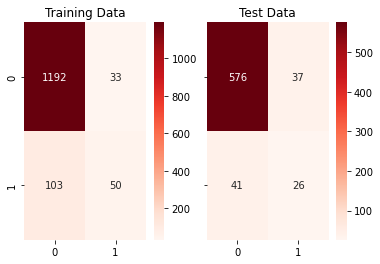

In [54]:
f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False)
plot_0 = sns.heatmap((metrics.confusion_matrix(y_train, pred_train_lda)),annot=True,fmt='.5g',cmap='Reds',ax=a[0][0]);
a[0][0].set_title('Training Data')
plot_1 = sns.heatmap((metrics.confusion_matrix(y_test, pred_test_lda)),annot=True,fmt='.5g',cmap='Reds',ax=a[0][1]);
a[0][1].set_title('Test Data');

AUC for the Training Data: 0.899


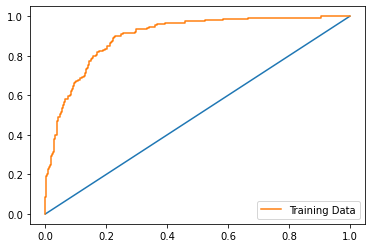

In [55]:
train_auc_lda = metrics.roc_auc_score(y_train,ytrain_predict_prob_lda[:,1])
print('AUC for the Training Data: %.3f' % train_auc_lda)
fpr, tpr, thresholds = metrics.roc_curve(y_train,ytrain_predict_prob_lda[:,1])
plt.plot([0, 1], [0, 1], linestyle='-')
plt.plot(fpr, tpr,label = 'Training Data')
plt.legend(loc='best')
plt.show()

AUC for the Test Data: 0.839


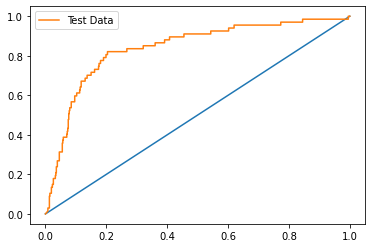

In [56]:
test_auc_lda = metrics.roc_auc_score(y_test,ytest_predict_prob_lda[:,1])
print('AUC for the Test Data: %.3f' %test_auc_lda )
fpr, tpr, thresholds = metrics.roc_curve(y_test,ytest_predict_prob_lda[:,1])
plt.plot([0, 1], [0, 1], linestyle='-')
plt.plot(fpr, tpr,label='Test Data')
plt.legend(loc='best')
plt.show()

In [57]:
LogR = LogisticRegression()

In [58]:
selector = RFE(estimator = LogR, n_features_to_select=15, step=1)

In [59]:
selector = selector.fit(X_train, y_train)

In [60]:
selector.n_features_

15

In [61]:
selector.ranking_

array([ 1,  3, 16,  1, 23, 21, 25, 33,  8, 28,  1, 41, 24, 18, 31,  1, 10,
        5, 37, 26, 29,  1,  1,  1,  1, 34, 17,  1, 14, 27, 36,  1, 19, 22,
        1,  1,  7, 40, 39,  2,  4,  1,  1,  9, 15, 12, 20, 38, 32,  1, 11,
       35, 13,  6, 30])

In [62]:
from sklearn.metrics import confusion_matrix, classification_report

In [63]:
pred_train = selector.predict(X_train)
pred_test = selector.predict(X_test)

In [64]:
print(confusion_matrix(y_train, pred_train))

[[1190   35]
 [ 147    6]]


In [65]:
print(classification_report(y_train, pred_train))

              precision    recall  f1-score   support

           0       0.89      0.97      0.93      1225
           1       0.15      0.04      0.06       153

    accuracy                           0.87      1378
   macro avg       0.52      0.51      0.50      1378
weighted avg       0.81      0.87      0.83      1378



In [66]:
print(confusion_matrix(y_test, pred_test))

[[587  26]
 [ 64   3]]


In [67]:
print(classification_report(y_test, pred_test))

              precision    recall  f1-score   support

           0       0.90      0.96      0.93       613
           1       0.10      0.04      0.06        67

    accuracy                           0.87       680
   macro avg       0.50      0.50      0.50       680
weighted avg       0.82      0.87      0.84       680



In [68]:
ytrain_predict_prob_lgr= selector.predict_proba(X_train)
pd.DataFrame(ytrain_predict_prob_lgr).head()

,0,1
0,0.878626,0.121374
1,0.993381,0.006619
2,0.863217,0.136783
3,0.909813,0.090187
4,0.932414,0.067586


In [69]:
ytest_predict_prob_lgr= selector.predict_proba(X_test)
pd.DataFrame(ytest_predict_prob_lgr).head()

,0,1
0,0.500000,0.500000
1,0.962616,0.037384
2,0.887502,0.112498
3,0.811635,0.188365
4,0.870611,0.129389


AUC for the Training Data: 0.624


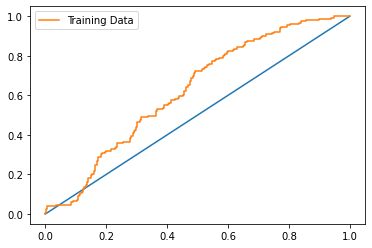

In [70]:
train_auc_lgr = metrics.roc_auc_score(y_train,ytrain_predict_prob_lgr[:,1])
print('AUC for the Training Data: %.3f' % train_auc_lgr)
fpr, tpr, thresholds = metrics.roc_curve(y_train,ytrain_predict_prob_lgr[:,1])
plt.plot([0, 1], [0, 1], linestyle='-')
plt.plot(fpr, tpr,label = 'Training Data')
plt.legend(loc='best')
plt.show()

AUC for the Test Data: 0.609


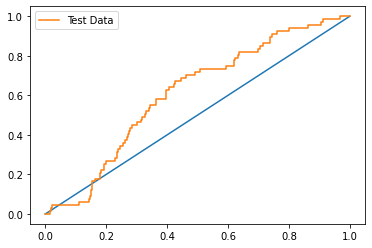

In [71]:
test_auc_lgr = metrics.roc_auc_score(y_test,ytest_predict_prob_lgr[:,1])
print('AUC for the Test Data: %.3f' % test_auc_lgr)
fpr, tpr, thresholds = metrics.roc_curve(y_test,ytest_predict_prob_lgr[:,1])
plt.plot([0, 1], [0, 1], linestyle='-')
plt.plot(fpr, tpr,label = 'Test Data')
plt.legend(loc='best')
plt.show()